# Problem 7
Let $A$ be the $20000 \times 20000$ matrix whose entries are 0 everywhere except for the primes $2,3,5,7,\cdots,224737$ along the main diagonal and the number 1 in all the positions $ a_{ij} $ with $ |i-j| = 1,2,4,8,\cdots,16384$. What is the $(1,1)$ entry of $A^{-1}$

### Some introductory code 

In [1]:
import numpy as np

def is_prime(N):
    return N > 1 and all([N%i != 0 for i in range(2, int(N**0.5+1))])

primes = [i for i in range(2,250000) if is_prime(i)][:20000]
entries = [(i,i,primes[i]) for i in range(len(primes))]
for diff in [2**j for j in range(15)]:
    for i in range(20000):
        j1, j2 = i+diff, i-diff
        if 0<=j1<20000: entries.append((i,j1,1))
        if 0<=j2<20000: entries.append((i,j2,1))
entries = np.array(entries)
print(entries.shape)

(554466, 3)


### Attempt 1: Using standard libraries

Note that A is very sparse - with only $\frac{554,466}{20000^2} \approx 0.14\% $ of its entries being non-zero

![Plot of upper left 100x100 quadrant](media/prob7/plot1.png)
![Plot of entire matrix](media/prob7/plot2.png)

We therefore avoid calculating $A^{-1}$ explicitly (note that this is intractable as matrix inversion has a time complexity of $O(n^3)$) 

Instead, note that if we have $\hat{v}$ be the first column of $ A^{-1} $, then we get that $ A \hat{v} = (1,0,\cdots, 0)^{T}$. We use [BIConjugate Gradient iteration in scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.bicg.html#scipy.sparse.linalg.bicg) to solve this sparse system.

In [2]:
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import bicg

row, col, data = entries[:, 0], entries[:, 1], entries[:, 2]

A = coo_matrix((data, (row, col))).tocsc()
b = np.zeros(A.shape[0])
b[0] = 1

iterations = 0
curr_xk = None
change_iter = []
def callback(xk):
    global iterations, curr_xk
    iterations += 1
    if curr_xk is not None:
        change_iter.append(xk[0] - curr_xk)
    curr_xk = xk[0]
x, exit_code = bicg(A,b,tol=1e-50,callback=callback)
x[0]

0.7250783462684014

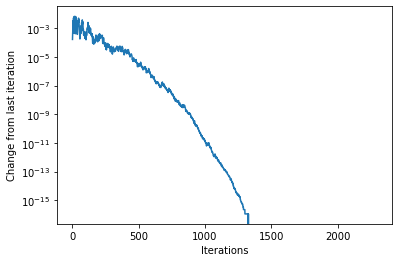

In [3]:
import matplotlib.pyplot as plt

plt.yscale('log'); plt.xlabel("Iterations"); plt.ylabel("Change from last iteration")
plt.plot(range(len(change_iter)), change_iter)
plt.show()